<a href="https://colab.research.google.com/github/highway92/machine_learning/blob/main/year_dream/05_sklearn_penalization_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will explore the three methods and compare their results with a multiple linear regression model applied to Boston Housing dataset. The target variable is price and the features are 10 polynomial features of LSTAT: % lower status of the population. LSTAT2=  LSTAT2 , LSTAT3=  LSTAT3 , and etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
rand_state= 1000

In [3]:
df = pd.read_csv("./Regularization_Boston.csv")

In [4]:
df.head()

,price,LSTAT,LSTAT2,LSTAT3,LSTAT4,LSTAT5,LSTAT6,LSTAT7,LSTAT8,LSTAT9,LSTAT10
0,24.0,4.98,24.8004,123.505992,615.059840,3062.998004,15253.730060,7.596358e+04,3.782986e+05,1.883927e+06,9.381957e+06
1,21.6,9.14,83.5396,763.551944,6978.864768,63786.823980,583011.571200,5.328726e+06,4.870455e+07,4.451596e+08,4.068759e+09
2,34.7,4.03,16.2409,65.450827,263.766833,1062.980336,4283.810755,1.726376e+04,6.957294e+04,2.803790e+05,1.129927e+06
3,33.4,2.94,8.6436,25.412184,74.711821,219.652754,645.779096,1.898591e+03,5.581856e+03,1.641066e+04,4.824733e+04
4,36.2,5.33,28.4089,151.419437,807.065599,4301.659644,22927.845900,1.222054e+05,6.513549e+05,3.471722e+06,1.850428e+07


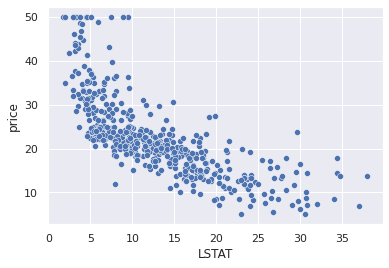

In [5]:
sns.scatterplot(x='LSTAT', y='price', data=df)
plt.show()

# 과제: 04_sklearn_penalization_1.ipynb의 과정을 위 데이터셋에 적용해 보는 것입니다!

# Q1. normalize the features!

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
# Your code
scaler = StandardScaler()
df_sc = scaler.fit_transform(df)


In [8]:
df.describe()

,price,LSTAT,LSTAT2,LSTAT3,LSTAT4,LSTAT5,LSTAT6,LSTAT7,LSTAT8,LSTAT9,LSTAT10
count,506.000000,506.000000,506.000000,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,22.532806,12.653063,210.993989,4285.788793,1.001336e+05,2.587609e+06,7.198029e+07,2.114923e+09,6.477077e+10,2.048399e+12,6.645292e+13
std,9.197104,7.141062,236.061920,7329.288372,2.342059e+05,7.737927e+06,2.628503e+08,9.126326e+09,3.223061e+11,1.153345e+13,4.169512e+14
min,5.000000,1.730000,2.992900,5.177717,8.957450e+00,1.549639e+01,2.680875e+01,4.637914e+01,8.023592e+01,1.388081e+02,2.401381e+02
25%,17.025000,6.950000,48.303700,335.727443,2.333481e+03,1.621932e+04,1.127384e+05,7.836504e+05,5.447333e+06,3.786664e+07,2.632333e+08
50%,21.200000,11.360000,129.050000,1466.017088,1.665411e+04,1.891930e+05,2.149266e+06,2.441612e+07,2.773731e+08,3.151037e+09,3.579677e+10
75%,25.000000,16.955000,287.472100,4874.091998,8.264029e+04,1.401168e+06,2.375683e+07,4.027977e+08,6.829447e+09,1.157935e+11,1.963285e+12
max,50.000000,37.970000,1441.720900,54742.142570,2.078559e+06,7.892289e+07,2.996702e+09,1.137850e+11,4.320410e+12,1.640460e+14,6.228820e+15


In [9]:
df_sc = pd.DataFrame(df_sc, columns = df.columns)
df_sc.head()

,price,LSTAT,LSTAT2,LSTAT3,LSTAT4,LSTAT5,LSTAT6,LSTAT7,LSTAT8,LSTAT9,LSTAT10
0,0.159686,-1.075562,-0.789529,-0.568459,-0.425339,-0.334341,-0.274058,-0.231960,-0.201158,-0.177781,-0.159536
1,-0.101524,-0.492439,-0.540454,-0.481046,-0.398141,-0.326485,-0.271896,-0.231384,-0.201008,-0.177742,-0.159526
2,1.324247,-1.208727,-0.825825,-0.576388,-0.426841,-0.334599,-0.274100,-0.231966,-0.201159,-0.177781,-0.159536
3,1.182758,-1.361517,-0.858040,-0.581856,-0.427649,-0.334708,-0.274114,-0.231968,-0.201159,-0.177781,-0.159536
4,1.487503,-1.026501,-0.774228,-0.564647,-0.424519,-0.334180,-0.274029,-0.231955,-0.201157,-0.177781,-0.159536


# Q2. Splitting the data (train / test)
test_size=0.2, random_state=rand_state

In [10]:
from sklearn.model_selection import train_test_split
y = df_sc['price']
X = df_sc.drop('price', axis=1)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = rand_state)

# Q3. Training the models

In [14]:
y_train.head()

300    0.246756
32    -1.015759
181    1.487503
272    0.203221
477   -1.146364
Name: price, dtype: float64

1. Linear regression (model_linear)
2. Ridge regression (model_ridge)
3. Lasso regression (model_lasso)
4. Elastic Net regression (model_net)

In [15]:
from sklearn.linear_model import LinearRegression, Ridge,RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

In [16]:
# starting with default parameters:
model_linear = LinearRegression()
model_ridge = Ridge()
model_lasso = Lasso()
model_net = ElasticNet()

In [17]:
y_hat_linear = model_linear.fit(X_train,y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train,y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train,y_train).predict(X_test)
y_hat_net = model_net.fit(X_train,y_train).predict(X_test)

# Q4. Performance in the test set for 4 models.

In [18]:
df_predictions = pd.DataFrame({'y_test' :  y_test,
                               'y_hat_linear' :  y_hat_linear,
                               'y_hat_ridge' : y_hat_ridge,
                               'y_hat_lasso' : y_hat_lasso,
                               'y_hat_net' : y_hat_net})

df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
483,-0.079757,-0.019459,0.029108,0.009199,0.059533
426,-1.342272,-0.480570,-0.589703,0.009199,-0.054729
22,-0.798084,-0.736176,-0.786380,0.009199,-0.120425
268,2.282016,2.053967,1.495823,0.009199,0.216942
371,2.989460,0.041490,0.171371,0.009199,0.078830


# Q5. Plotting the regression coefficients vs alphas:

## 1) Ridge

In [21]:
alpha_ridge = 10 ** np.linspace(-2,4,100)
ridge = Ridge()
coefs_ridge = []

for i in alpha_ridge:
  ridge.set_params(alpha = i)
  ridge.fit(X_train, y_train)
  coefs_ridge.append(ridge.coef_)

np.shape(coefs_ridge)

(100, 10)

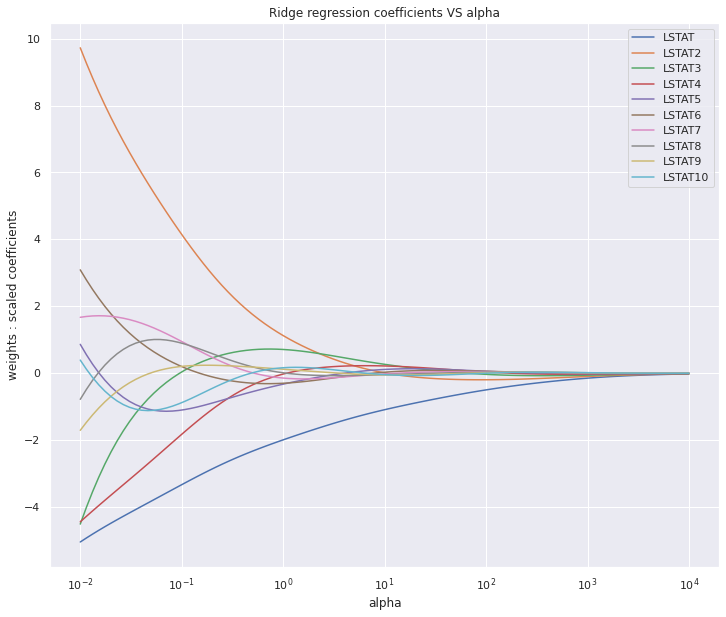

In [22]:
plt.figure(figsize = (12,10))
ax = plt.gca()
ax.plot(alpha_ridge, coefs_ridge)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights : scaled coefficients')
plt.title('Ridge regression coefficients VS alpha')
plt.legend(df.drop('price', axis = 1, inplace=False).columns)

plt.show()

## 2) Lasso

In [23]:
alpha_lasso = 10 ** np.linspace(-3,1,100)
lasso = Lasso()

coefs_lasso = []

for i in alpha_lasso:
  lasso.set_params(alpha = i)
  lasso.fit(X_train, y_train)
  coefs_lasso.append(lasso.coef_)

np.shape(coefs_lasso)

(100, 10)

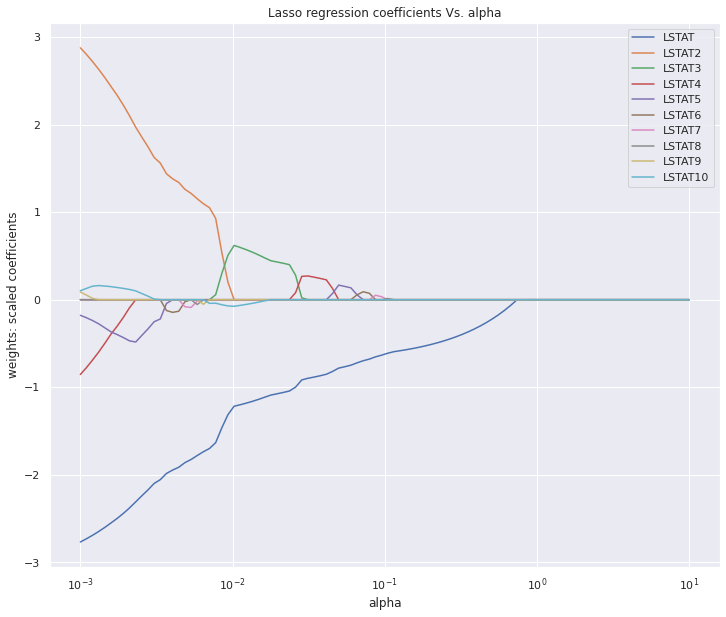

In [25]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(df.drop('price',axis=1, inplace=False).columns)

plt.show()

## 3) ElasticNet

In [28]:
alpha_net = 10 ** np.linspace(-3,2,100)
net = ElasticNet()

coefs_net = []

for i in alpha_net:
  net.set_params(alpha = i)
  net.fit(X_train, y_train)
  coefs_net.append(net.coef_)

np.shape(coefs_net)

(100, 10)

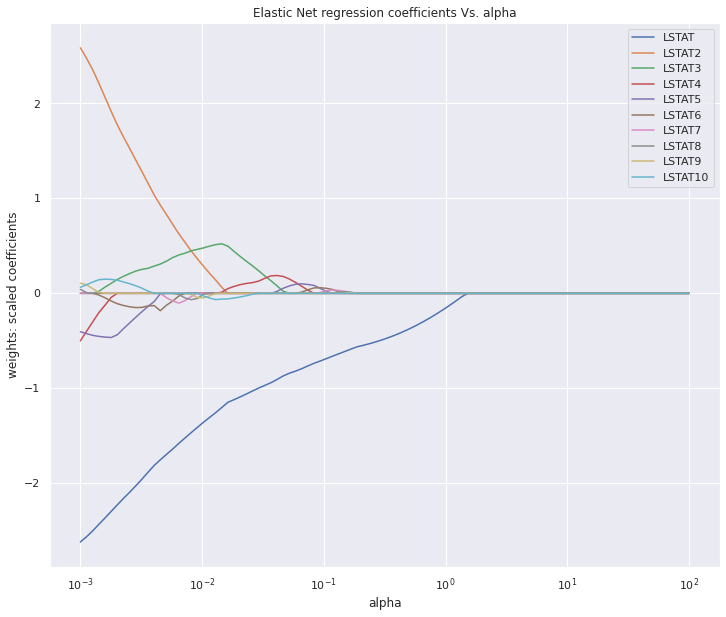

In [29]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_net, coefs_net)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Elastic Net regression coefficients Vs. alpha')
plt.legend(df.drop('price',axis=1, inplace=False).columns)

plt.show()

# Q6. Cross Validation

## 1) Ridge

In [32]:
ridgecv = RidgeCV()
ridgecv.fit(X_train, y_train)
ridgecv.alpha_


0.1

## 2) Lasso

In [33]:
lassocv = LassoCV()
lassocv.fit(X_train, y_train)
lassocv.alpha_

0.0007404280761639708

## 3) ElasticNet

In [34]:
elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train, y_train)
elasticnetcv.alpha_

0.0014808561523279417

# Done!